In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 파일이 저장된 디렉토리 경로 (예시)
directory_path = './combined_data'

# 디렉토리에서 모든 CSV 파일 리스트 가져오기
csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]

In [2]:
# 결과를 저장할 리스트 초기화
comparison_results = []

# 각 CSV 파일에 대해 작업 수행
for csv_file in csv_files:
    # 파일 이름에 "1"이 포함된 파일을 제외
    if "1" in csv_file:
        continue
    
    file_path = os.path.join(directory_path, csv_file)
    
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # maxforce와 result 열이 있는지 확인
    if 'maxforce' in df.columns and 'result' in df.columns:
        # 상관계수 계산
        correlation = df['maxforce'].corr(df['result'])
        
        # 차이의 절대값 평균 계산
        mean_absolute_difference = (df['maxforce'] - df['result']).abs().mean()
        
        # maxforce와 result가 동일한 값의 비율 계산
        identical_percentage = (df['maxforce'] == df['result']).mean() * 100
        
        # 결과 저장
        comparison_results.append({
            'filename': csv_file,
            'correlation': correlation,
            'mean_absolute_difference': mean_absolute_difference,
            'identical_percentage': identical_percentage
        })
        
    else:
        print(f"'maxforce' or 'result' column missing in {csv_file}")

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(comparison_results)

# 결과 출력
print(results_df)


               filename  correlation  mean_absolute_difference  \
0   F2_I_2_combined.csv     0.928906                     0.056   
1   F2_I_3_combined.csv     0.951652                     0.044   
2   F2_I_4_combined.csv     0.981166                     0.024   
3   F2_S_2_combined.csv     0.766552                     0.144   
4   F2_S_3_combined.csv     0.963030                     0.040   
5   F2_S_4_combined.csv     0.944030                     0.052   
6   F3_I_2_combined.csv     0.943939                     0.052   
7   F3_I_3_combined.csv     0.798751                     0.124   
8   F3_I_4_combined.csv     0.950652                     0.044   
9   F3_S_2_combined.csv     0.644522                     0.168   
10  F3_S_3_combined.csv     0.668717                     0.188   
11  F3_S_4_combined.csv     0.633453                     0.160   
12  M2_I_2_combined.csv     0.975327                     0.032   
13  M2_I_3_combined.csv     0.993883                     0.008   
14  M2_I_4

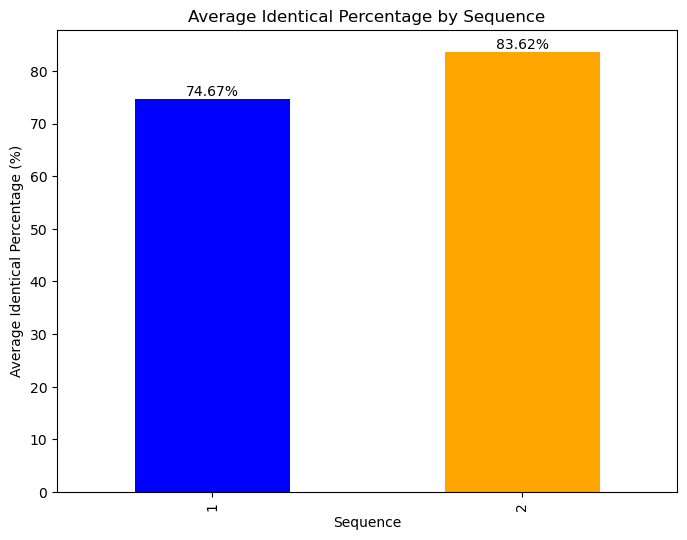

In [4]:
# 각 파일의 Sequence 값을 설정하는 조건
sequence_map = {
    "M1_I": "1", "M1_S": "2",
    "M2_I": "2", "M2_S": "1",
    "M3_I": "1", "M3_S": "2",
    "M4_I": "1", "M4_S": "2",
    "M5_I": "2", "M5_S": "1",
    "M6_I": "2", "M6_S": "1",
    "F1_I": "1", "F1_S": "2",
    "F2_I": "2", "F2_S": "1",
    "F3_I": "2", "F3_S": "1"
}

# 결과를 저장할 리스트 초기화
comparison_results = []

# 각 CSV 파일 경로를 불러와 처리하는 코드
def process_and_add_sequence_with_path(csv_files, sequence_map, directory_path):
    for csv_file in csv_files:
        if "1" in csv_file:
            continue
        # 파일 경로 만들기
        file_path = os.path.join(directory_path, csv_file)
        
        # 파일 이름에서 접두사 추출 (예: dohoon_I, jiyoung_S 등)
        prefix = '_'.join(csv_file.split('_')[:2])
        
        # CSV 파일 불러오기
        try:
            df = pd.read_csv(file_path)
        except FileNotFoundError:
            print(f"File not found: {file_path}")
            continue
        
        # Sequence 값 설정
        sequence_value = sequence_map.get(prefix)
        
        if sequence_value:
            # Sequence 컬럼 추가
            df['Sequence'] = sequence_value
            
            # maxforce와 result 열이 있는지 확인
            if 'maxforce' in df.columns and 'result' in df.columns:
                # 상관계수 계산
                correlation = df['maxforce'].corr(df['result'])
                
                # 차이의 절대값 평균 계산
                mean_absolute_difference = (df['maxforce'] - df['result']).abs().mean()
                
                # maxforce와 result가 동일한 값의 비율 계산
                identical_percentage = (df['maxforce'] == df['result']).mean() * 100
                
                # 결과 저장
                comparison_results.append({
                    'filename': csv_file,
                    'correlation': correlation,
                    'mean_absolute_difference': mean_absolute_difference,
                    'identical_percentage': identical_percentage,
                    'Sequence': sequence_value
                })
                
            # 수정된 파일을 같은 경로에 저장
            df.to_csv(file_path, index=False)
            # print(f"Processed {file_path} and added Sequence {sequence_value}")

process_and_add_sequence_with_path(csv_files, sequence_map, directory_path)

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(comparison_results)

# Sequence별 identical_percentage 평균 계산
sequence_grouped = results_df.groupby('Sequence')['identical_percentage'].mean()

# 그래프 그리기
plt.figure(figsize=(8, 6))
bars = sequence_grouped.plot(kind='bar', color=['blue', 'orange'])

# 각 막대에 퍼센티지 값 표시
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),
             f'{bar.get_height():.2f}%',  # 퍼센티지 값 표시
             ha='center',
             va='bottom')

# 그래프 제목 및 라벨 설정
plt.title('Average Identical Percentage by Sequence')
plt.xlabel('Sequence')
plt.ylabel('Average Identical Percentage (%)')

# 그래프 출력
plt.show()


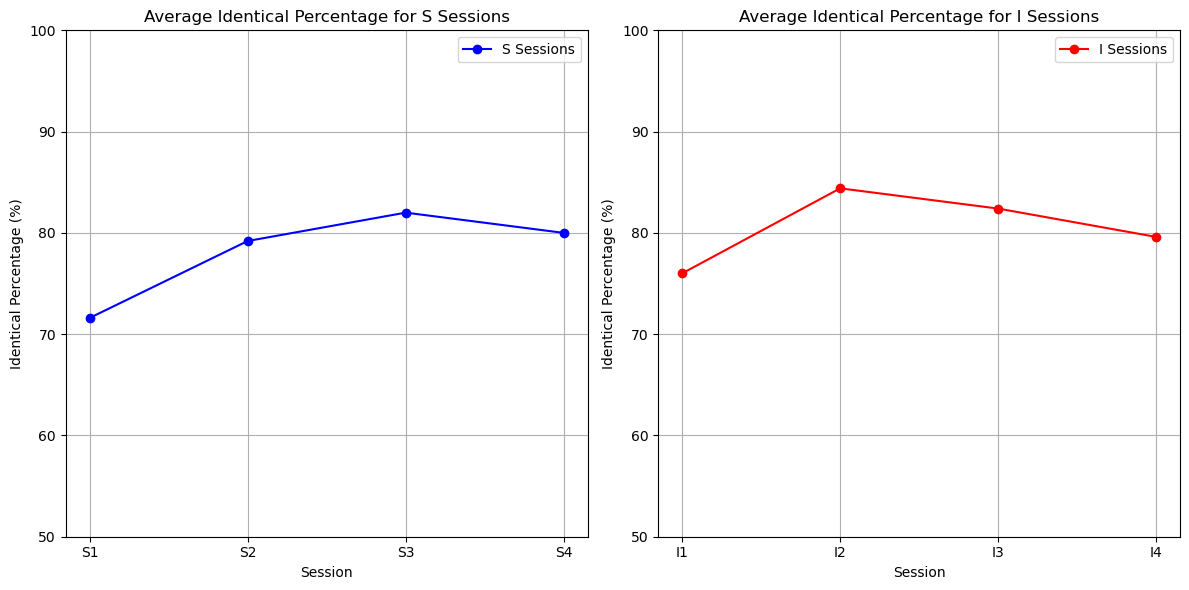

In [6]:

# S와 I에 해당하는 identical_percentage 저장 딕셔너리
identical_percentages = {'S1': [], 'S2': [], 'S3': [], 'S4': [],
                         'I1': [], 'I2': [], 'I3': [], 'I4': []}

# 각 CSV 파일에 대해 작업 수행
for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)
    
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # maxforce와 result 열이 있는지 확인
    if 'maxforce' in df.columns and 'result' in df.columns:
        # maxforce와 result가 동일한 값의 비율 계산
        identical_percentage = (df['maxforce'] == df['result']).mean() * 100
        
        # 파일 이름에서 S1, S2, S3, S4 또는 I1, I2, I3, I4를 추출하여 해당 리스트에 추가
        if '_S_1_' in csv_file:
            identical_percentages['S1'].append(identical_percentage)
        elif '_S_2_' in csv_file:
            identical_percentages['S2'].append(identical_percentage)
        elif '_S_3_' in csv_file:
            identical_percentages['S3'].append(identical_percentage)
        elif '_S_4_' in csv_file:
            identical_percentages['S4'].append(identical_percentage)
        elif '_I_1_' in csv_file:
            identical_percentages['I1'].append(identical_percentage)
        elif '_I_2_' in csv_file:
            identical_percentages['I2'].append(identical_percentage)
        elif '_I_3_' in csv_file:
            identical_percentages['I3'].append(identical_percentage)
        elif '_I_4_' in csv_file:
            identical_percentages['I4'].append(identical_percentage)
    else:
        print(f"'maxforce' or 'result' column missing in {csv_file}")

# S1, S2, S3, S4, I1, I2, I3, I4의 평균 계산
average_S1 = sum(identical_percentages['S1']) / len(identical_percentages['S1'])
average_S2 = sum(identical_percentages['S2']) / len(identical_percentages['S2'])
average_S3 = sum(identical_percentages['S3']) / len(identical_percentages['S3'])
average_S4 = sum(identical_percentages['S4']) / len(identical_percentages['S4'])

average_I1 = sum(identical_percentages['I1']) / len(identical_percentages['I1'])
average_I2 = sum(identical_percentages['I2']) / len(identical_percentages['I2'])
average_I3 = sum(identical_percentages['I3']) / len(identical_percentages['I3'])
average_I4 = sum(identical_percentages['I4']) / len(identical_percentages['I4'])
# S와 I의 평균을 리스트로 저장
averages_S = [average_S1, average_S2, average_S3, average_S4]
averages_I = [average_I1, average_I2, average_I3, average_I4]

# 두 개의 그래프 생성
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# S 세션 그래프 (왼쪽) - 파란색
axs[0].plot(['S1', 'S2', 'S3', 'S4'], averages_S, marker='o', color='blue', label='S Sessions')
axs[0].set_title('Average Identical Percentage for S Sessions')
axs[0].set_xlabel('Session')
axs[0].set_ylabel('Identical Percentage (%)')
axs[0].grid(True)
axs[0].legend()
axs[0].set_ylim(50, 100)  # y축 범위를 50%~100%로 설정

# I 세션 그래프 (오른쪽) - 빨간색
axs[1].plot(['I1', 'I2', 'I3', 'I4'], averages_I, marker='o', color='red', label='I Sessions')
axs[1].set_title('Average Identical Percentage for I Sessions')
axs[1].set_xlabel('Session')
axs[1].set_ylabel('Identical Percentage (%)')
axs[1].grid(True)
axs[1].legend()
axs[1].set_ylim(50, 100)  # y축 범위를 50%~100%로 설정

# 그래프 출력
plt.tight_layout()
plt.show()


#### 🧷**렌더링별 각 데이터 합산 결과**

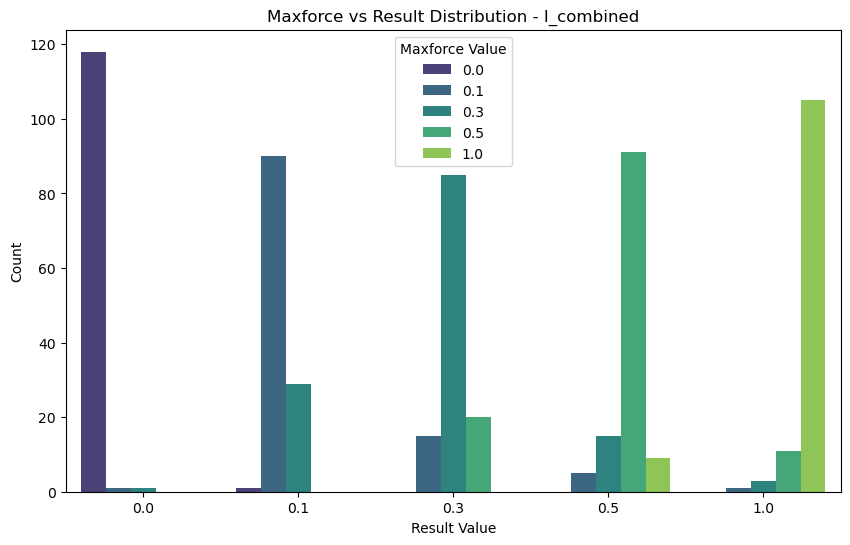

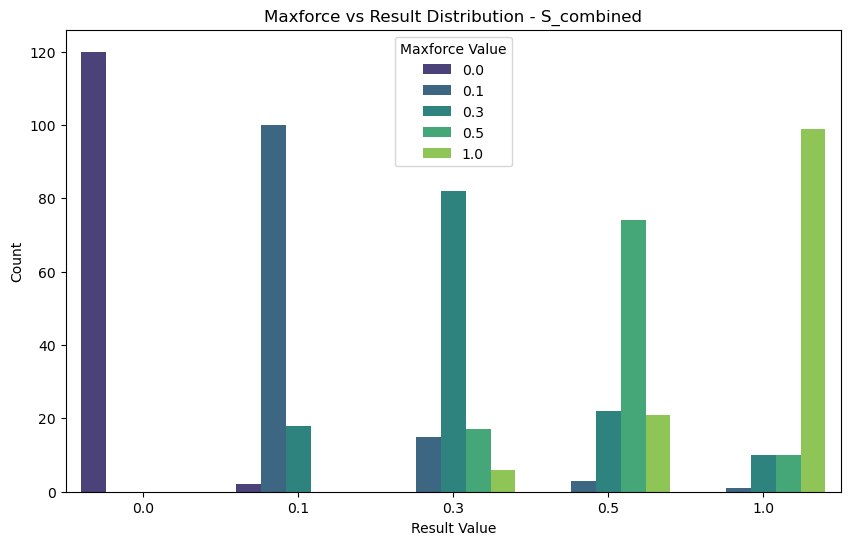

In [11]:
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# E_combined와 S_combined 파일 리스트 필터링, 파일 이름에 "1"이 포함된 파일 제외
i_combined_files = [f for f in os.listdir(directory_path) if re.search(r'I_\d+_combined\.csv$', f) and '1' not in f]
s_combined_files = [f for f in os.listdir(directory_path) if re.search(r'S_\d+_combined\.csv$', f) and '1' not in f]

# E_combined와 S_combined 데이터프레임 각각 합치기
df_i_combined = pd.concat([pd.read_csv(os.path.join(directory_path, file)) for file in i_combined_files])
df_s_combined = pd.concat([pd.read_csv(os.path.join(directory_path, file)) for file in s_combined_files])

# 데이터프레임을 합친 후 각각 동일한 작업 수행
for df_combined, combined_name in [(df_i_combined, 'I_combined'), (df_s_combined, 'S_combined')]:
    
    # maxforce와 result 열이 있는지 확인
    if 'maxforce' in df_combined.columns and 'result' in df_combined.columns:
        maxforce_values = [0.0, 0.1, 0.3, 0.5, 1.0]
        result_values = [0.0, 0.1, 0.3, 0.5, 1.0]
        
        distribution = []
        
        for maxforce_value in maxforce_values:
            for result_value in result_values:
                count = len(df_combined[(df_combined['maxforce'] == maxforce_value) & (df_combined['result'] == result_value)])
                distribution.append({
                    'maxforce_value': maxforce_value,
                    'result_value': result_value,
                    'count': count
                })
        
        distribution_df = pd.DataFrame(distribution)
        
        # 막대그래프 생성
        plt.figure(figsize=(10, 6))
        sns.barplot(x='result_value', y='count', hue='maxforce_value', data=distribution_df, palette='viridis')
        
        # 그래프 세부 설정
        plt.title(f'Maxforce vs Result Distribution - {combined_name}')
        plt.xlabel('Result Value')
        plt.ylabel('Count')
        plt.legend(title='Maxforce Value')
        
        # 그래프 출력
        plt.show()
        
    else:
        print(f"'maxforce' or 'result' column missing in {combined_name}")


In [12]:
# 결과를 저장할 리스트 초기화
comparison_results = []

# 각 데이터프레임에 대해 작업 수행
for df_combined, combined_name in [(df_i_combined, 'I_combined'), (df_s_combined, 'S_combined')]:
    
    # maxforce와 result 열이 있는지 확인
    if 'maxforce' in df_combined.columns and 'result' in df_combined.columns:
        # 상관계수 계산
        correlation = df_combined['maxforce'].corr(df_combined['result'])
        
        # 차이의 절대값 평균 계산
        mean_absolute_difference = (df_combined['maxforce'] - df_combined['result']).abs().mean()
        
        # maxforce와 result가 동일한 값의 비율 계산
        identical_percentage = (df_combined['maxforce'] == df_combined['result']).mean() * 100
        
        # 결과 저장
        comparison_results.append({
            'filename': combined_name,
            'correlation': correlation,
            'mean_absolute_difference': mean_absolute_difference,
            'identical_percentage': identical_percentage
        })
                
    else:
        print(f"'maxforce' or 'result' column missing in {combined_name}")

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(comparison_results)

# 결과 출력
print(results_df)

     filename  correlation  mean_absolute_difference  identical_percentage
0  I_combined     0.923408                  0.052167             81.500000
1  S_combined     0.870853                  0.072333             79.166667
